# Details of Logistic Regression

Chapter 3

In [145]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split
from sklearn import metrics

#Settings for rendering plots
%matplotlib inline
import matplotlib as mpl
import seaborn as sns
mpl.rcParams["figure.dpi"] = 400

In [2]:
# read in data
df = pd.read_csv("Data/Chapter_1_cleaned_data.csv")

In [3]:
feature_responses = df.columns.tolist()

In [4]:
feature_responses[:5]

['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE']

In [5]:
feature_responses[-5:]

['EDUCATION_CAT', 'graduate school', 'high school', 'others', 'university']

In [6]:
items_to_remove = ["ID","SEX","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6","EDUCATION_CAT","graduate school","high school",
                  "none","others","university"]

In [7]:
# Example list comprehension
example_list_comp = [item for item in range(5)]
example_list_comp

[0, 1, 2, 3, 4]

In [8]:
feature_responses_clean = [item for item in feature_responses if item not in items_to_remove]
feature_responses_clean

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [9]:
corr = df[feature_responses_clean].corr()
corr.iloc[0:5,0:5]

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_1
LIMIT_BAL,1.000000,-0.232688,-0.111873,0.149157,-0.273396
EDUCATION,-0.232688,1.000000,-0.137097,0.179035,0.112653
MARRIAGE,-0.111873,-0.137097,1.000000,-0.412828,0.019759
AGE,0.149157,0.179035,-0.412828,1.000000,-0.044277
PAY_1,-0.273396,0.112653,0.019759,-0.044277,1.000000


<AxesSubplot:>

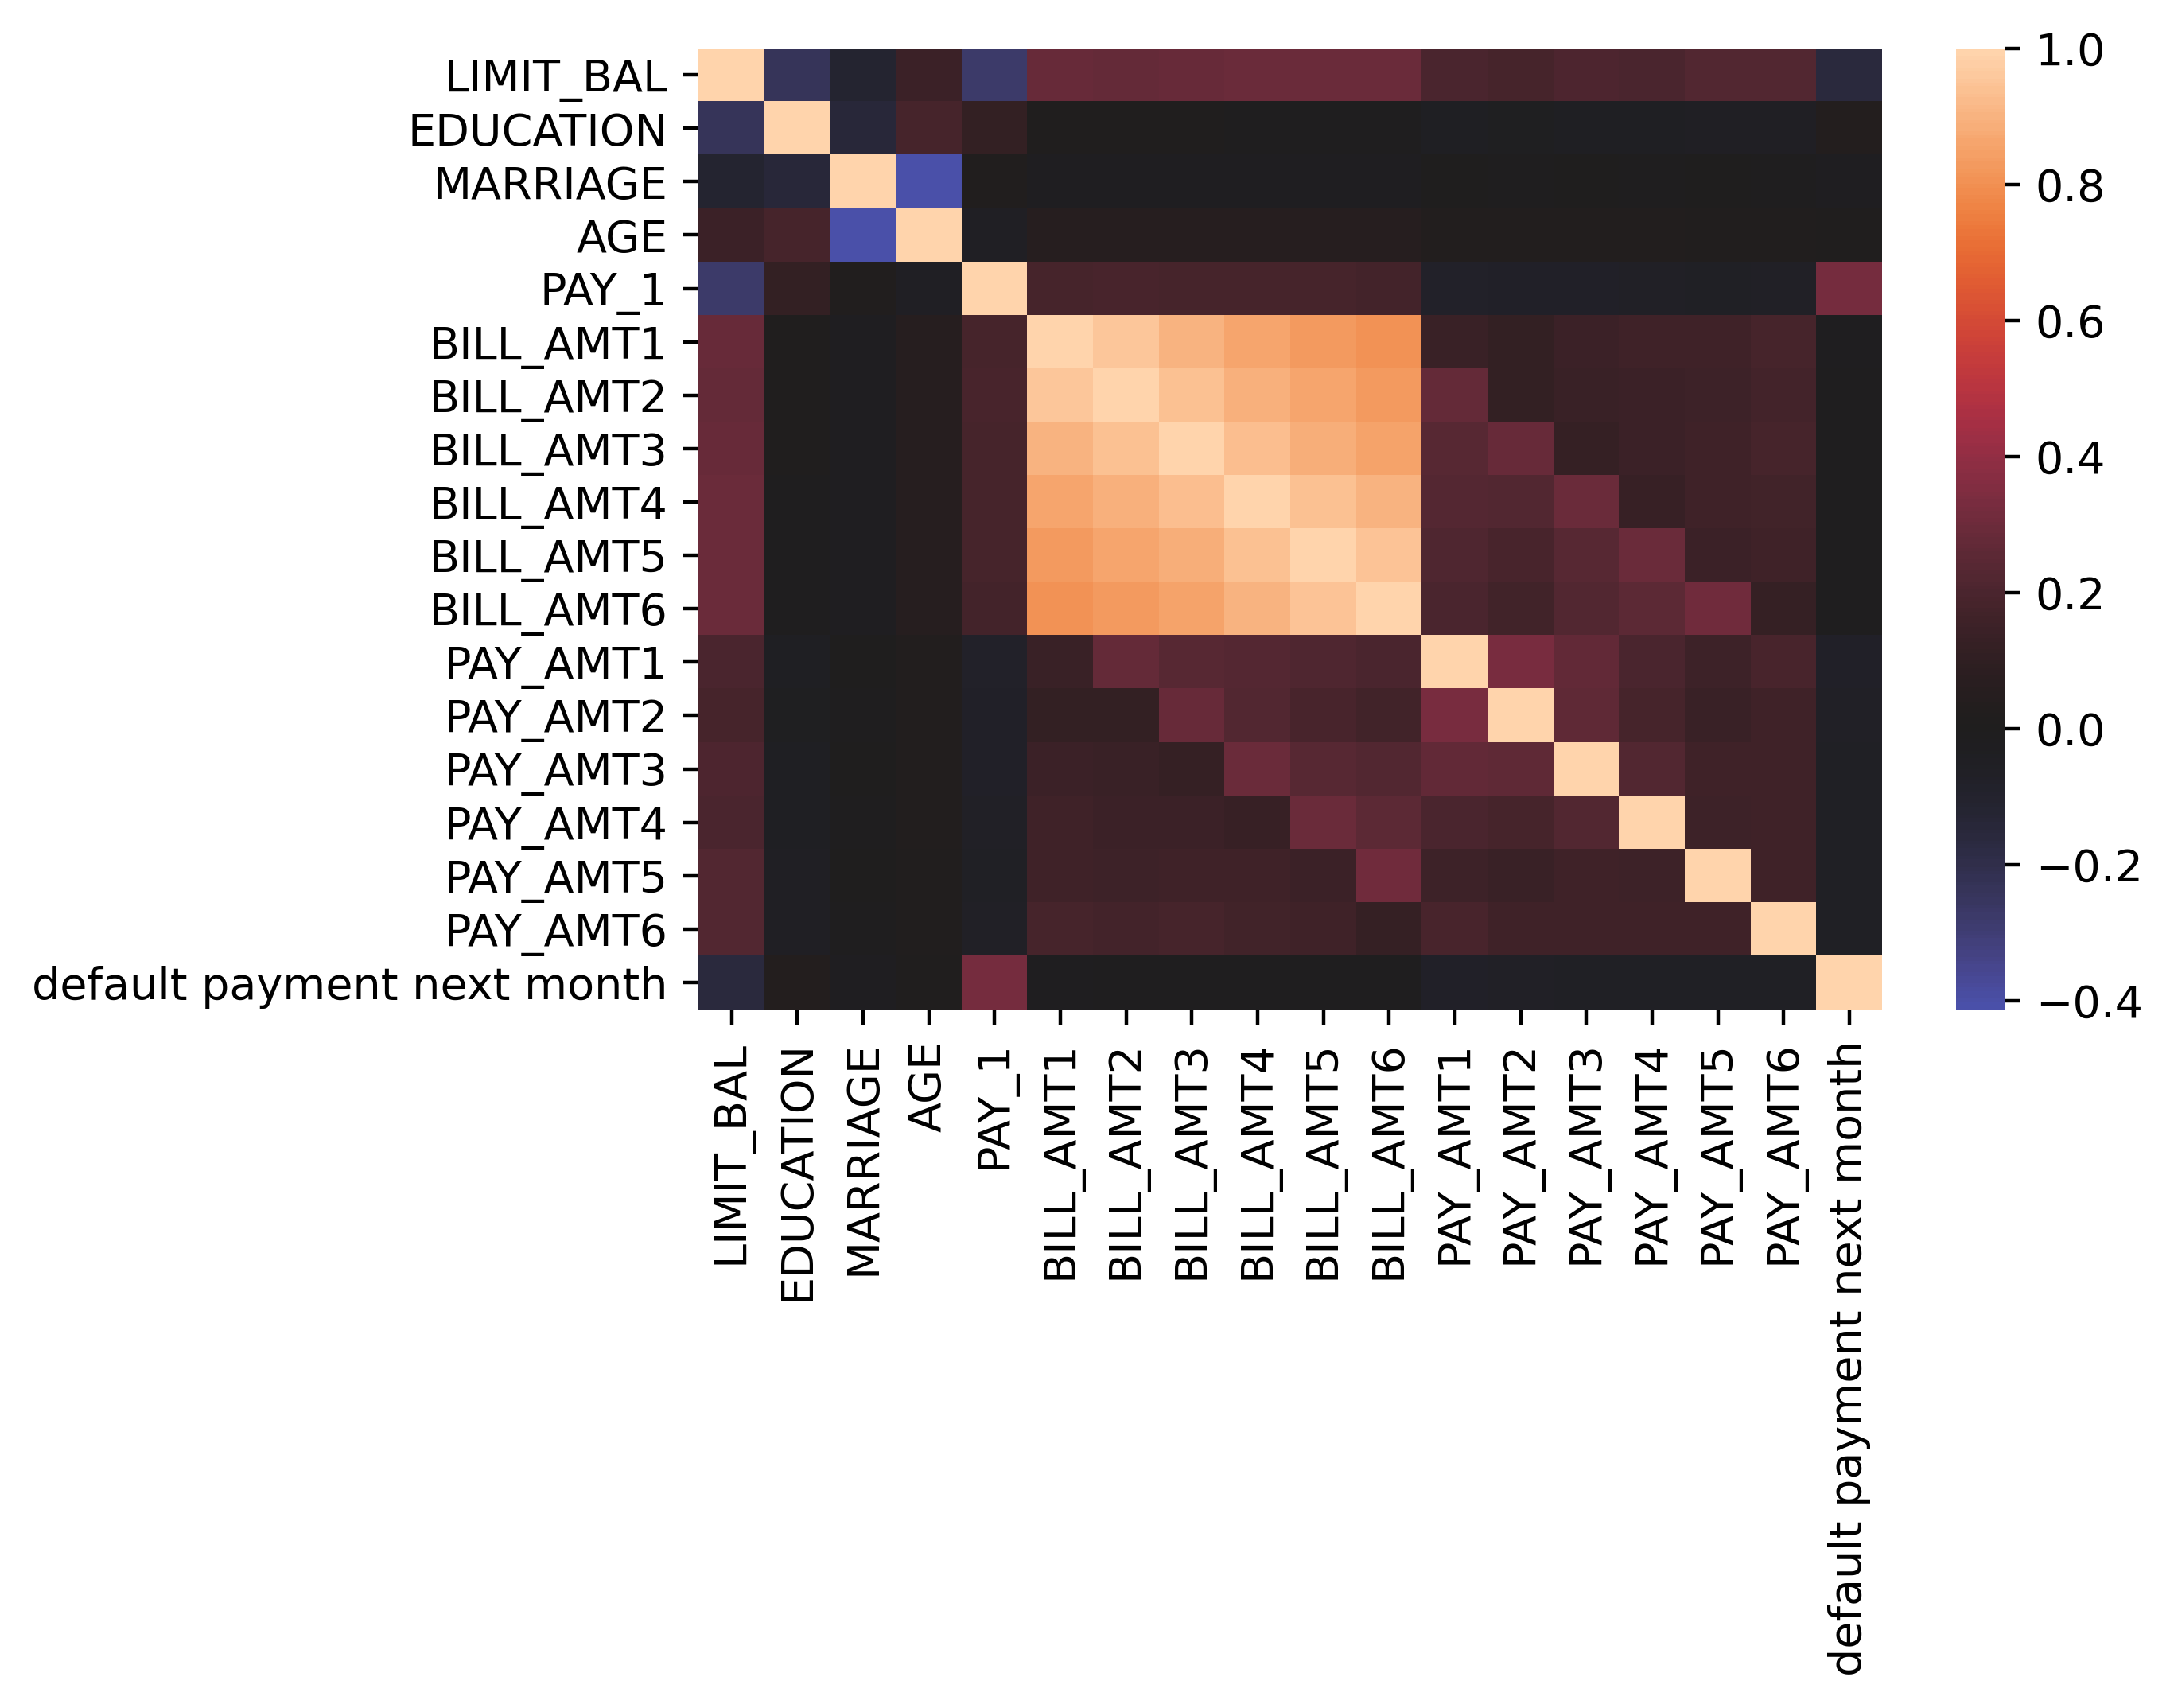

In [10]:
# Create a heat map
sns.heatmap(corr, xticklabels = corr.columns.values, yticklabels = corr.columns.values, center = 0)

# F Tests

- Complete an F test in sckit learn

In [11]:
X = df[feature_responses_clean].iloc[:,:-1].values
Y = df[feature_responses_clean].iloc[:,-1].values
print(X.shape, Y.shape)

(26664, 17) (26664,)


In [12]:
[f_stat, f_p_value] = f_classif(X,Y)

In [13]:
f_test_df = pd.DataFrame({"Feature":feature_responses_clean[:-1],"F statistic":f_stat,"p value":f_p_value})
f_test_df.sort_values("p value")

,Feature,F statistic,p value
4,PAY_1,3156.672300,0.000000e+00
0,LIMIT_BAL,651.324071,5.838366e-142
11,PAY_AMT1,140.612679,2.358354e-32
12,PAY_AMT2,101.408321,8.256124e-24
13,PAY_AMT3,90.023873,2.542641e-21
15,PAY_AMT5,85.843295,2.090120e-20
16,PAY_AMT6,80.420784,3.219565e-19
14,PAY_AMT4,79.640021,4.774112e-19
1,EDUCATION,32.637768,1.122175e-08
2,MARRIAGE,18.078027,2.127555e-05


In [14]:
selector = SelectPercentile(f_classif, percentile = 20)
selector.fit(X,Y)

SelectPercentile(percentile=20)

In [15]:
best_feature_ix = selector.get_support()
best_feature_ix

array([ True, False, False, False,  True, False, False, False, False,
       False, False,  True,  True, False, False, False, False])

In [16]:
features = feature_responses_clean[:-1]
best_features = [features[counter] for counter in range(len(features)) if best_feature_ix[counter]]
best_features

['LIMIT_BAL', 'PAY_1', 'PAY_AMT1', 'PAY_AMT2']

In [17]:
overall_default_rate = df["default payment next month"].mean()
overall_default_rate

0.2217971797179718

In [18]:
group_by_pay_mean_y = df.groupby("PAY_1").agg({"default payment next month":np.mean})
group_by_pay_mean_y

,default payment next month
PAY_1,
-2,0.131664
-1,0.170002
0,0.128295
1,0.336400
2,0.694701
3,0.773973
4,0.682540
5,0.434783
6,0.545455


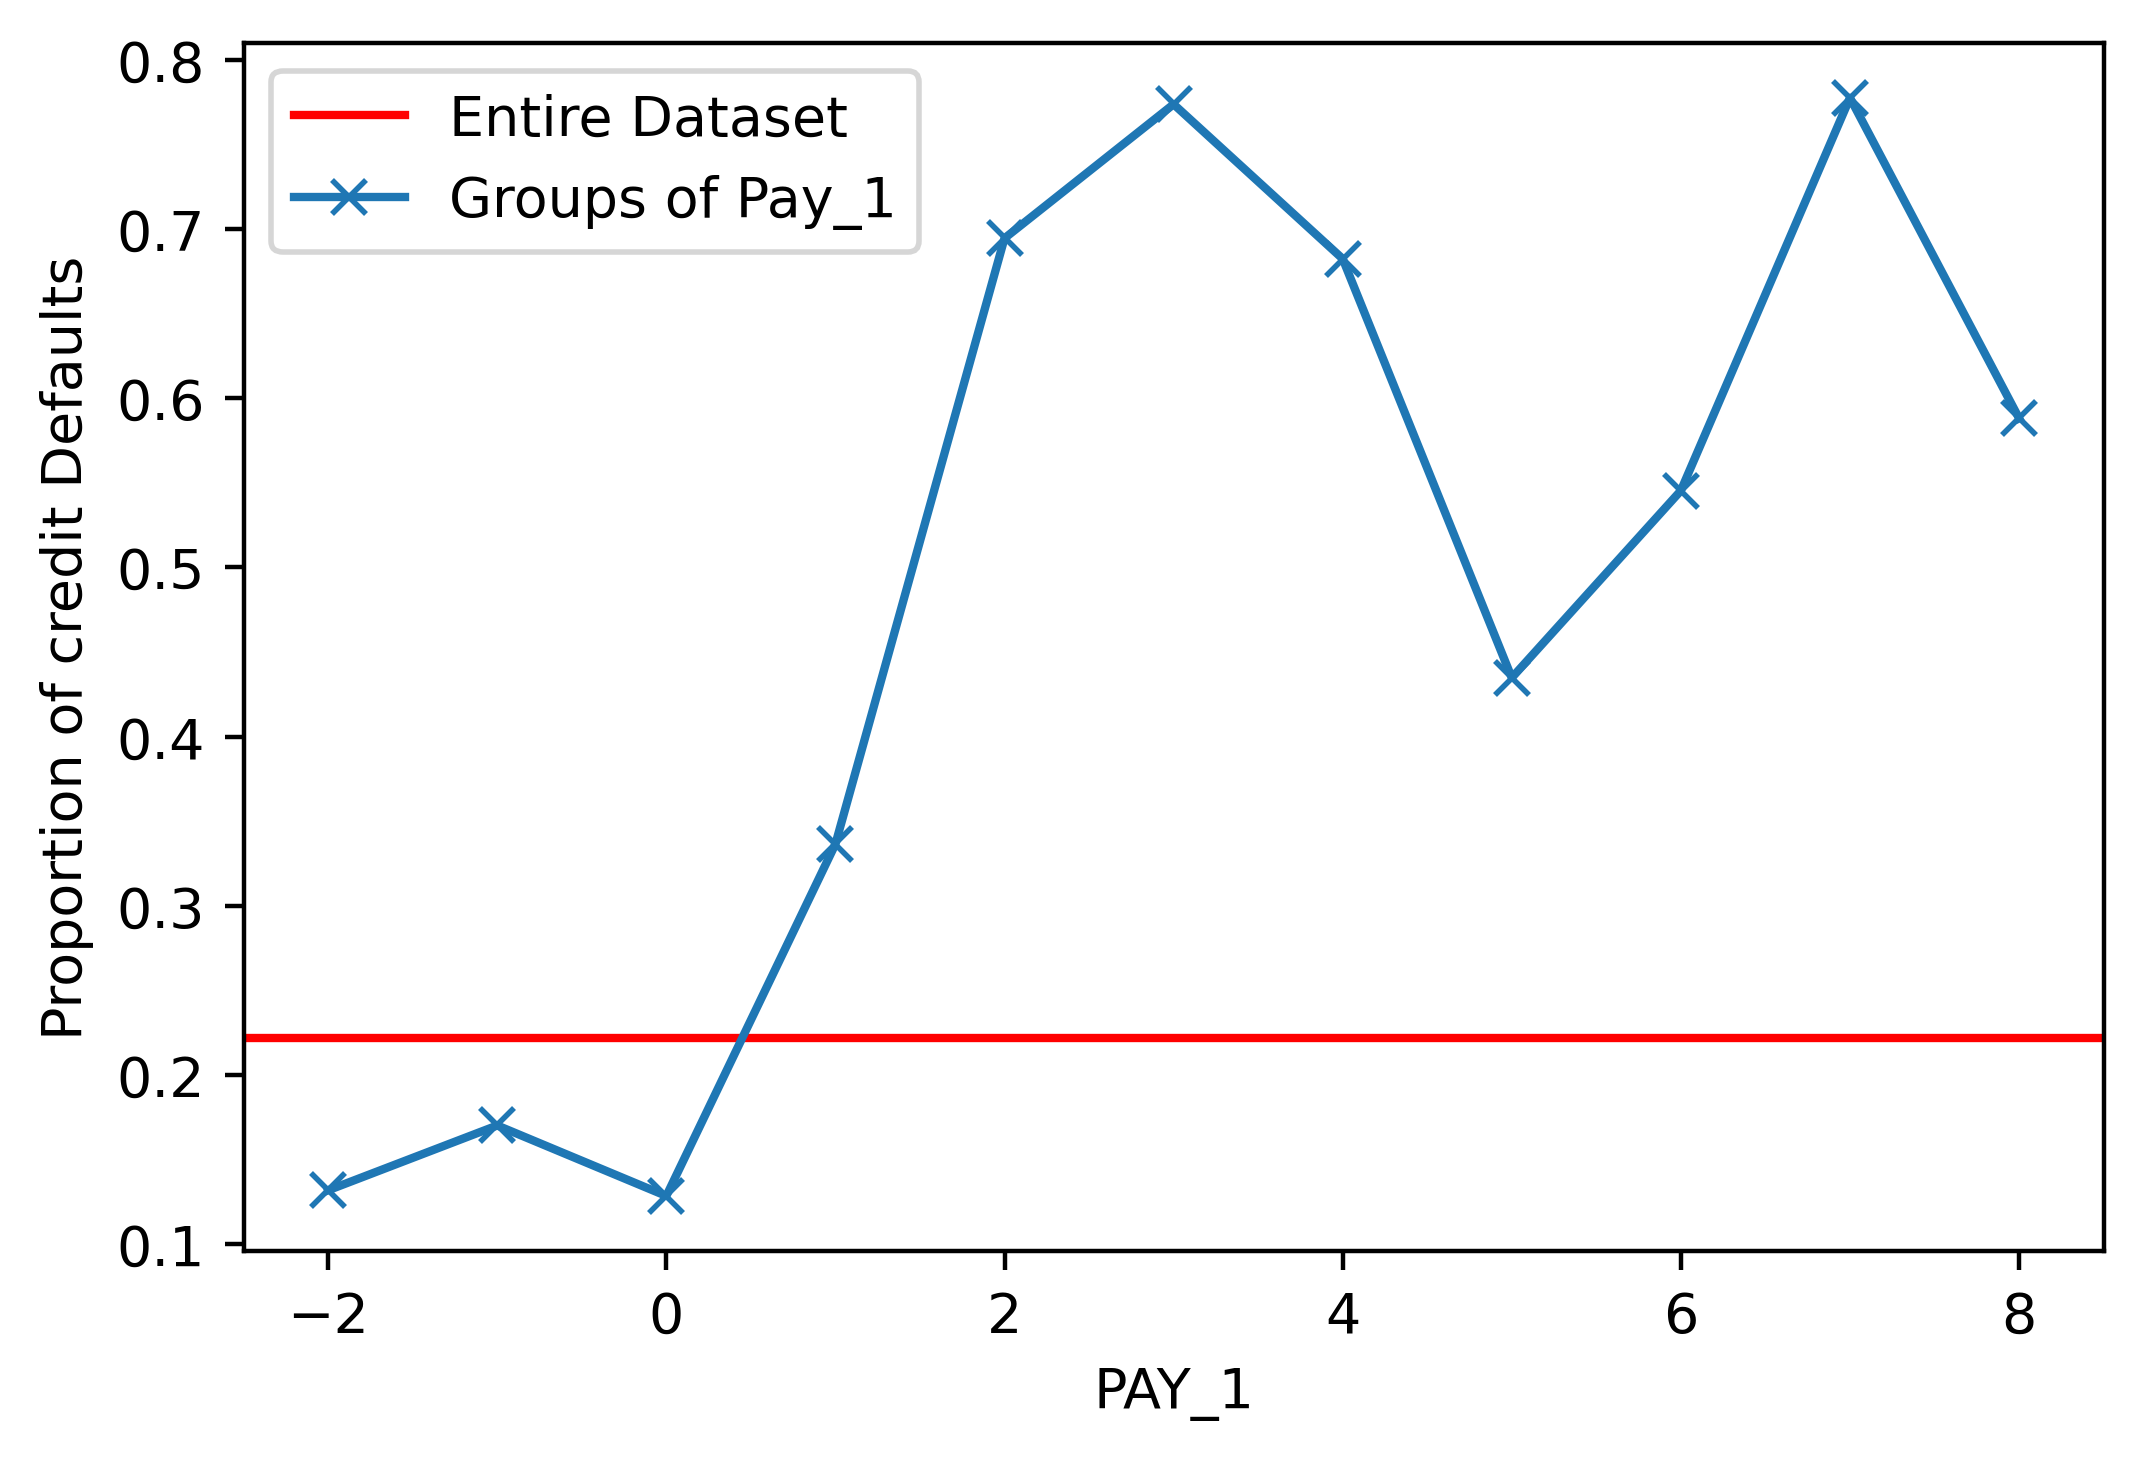

In [19]:
axes = plt.axes()
axes.axhline(overall_default_rate, color = "red")
group_by_pay_mean_y.plot(marker = "x", legend = False, ax = axes)
axes.set_ylabel("Proportion of credit Defaults")
axes.legend(["Entire Dataset", "Groups of Pay_1"])

In [20]:
pos_mask = Y == 1
neg_mask = Y == 0

Text(0.5, 1.0, 'Credit Limits by response variable')

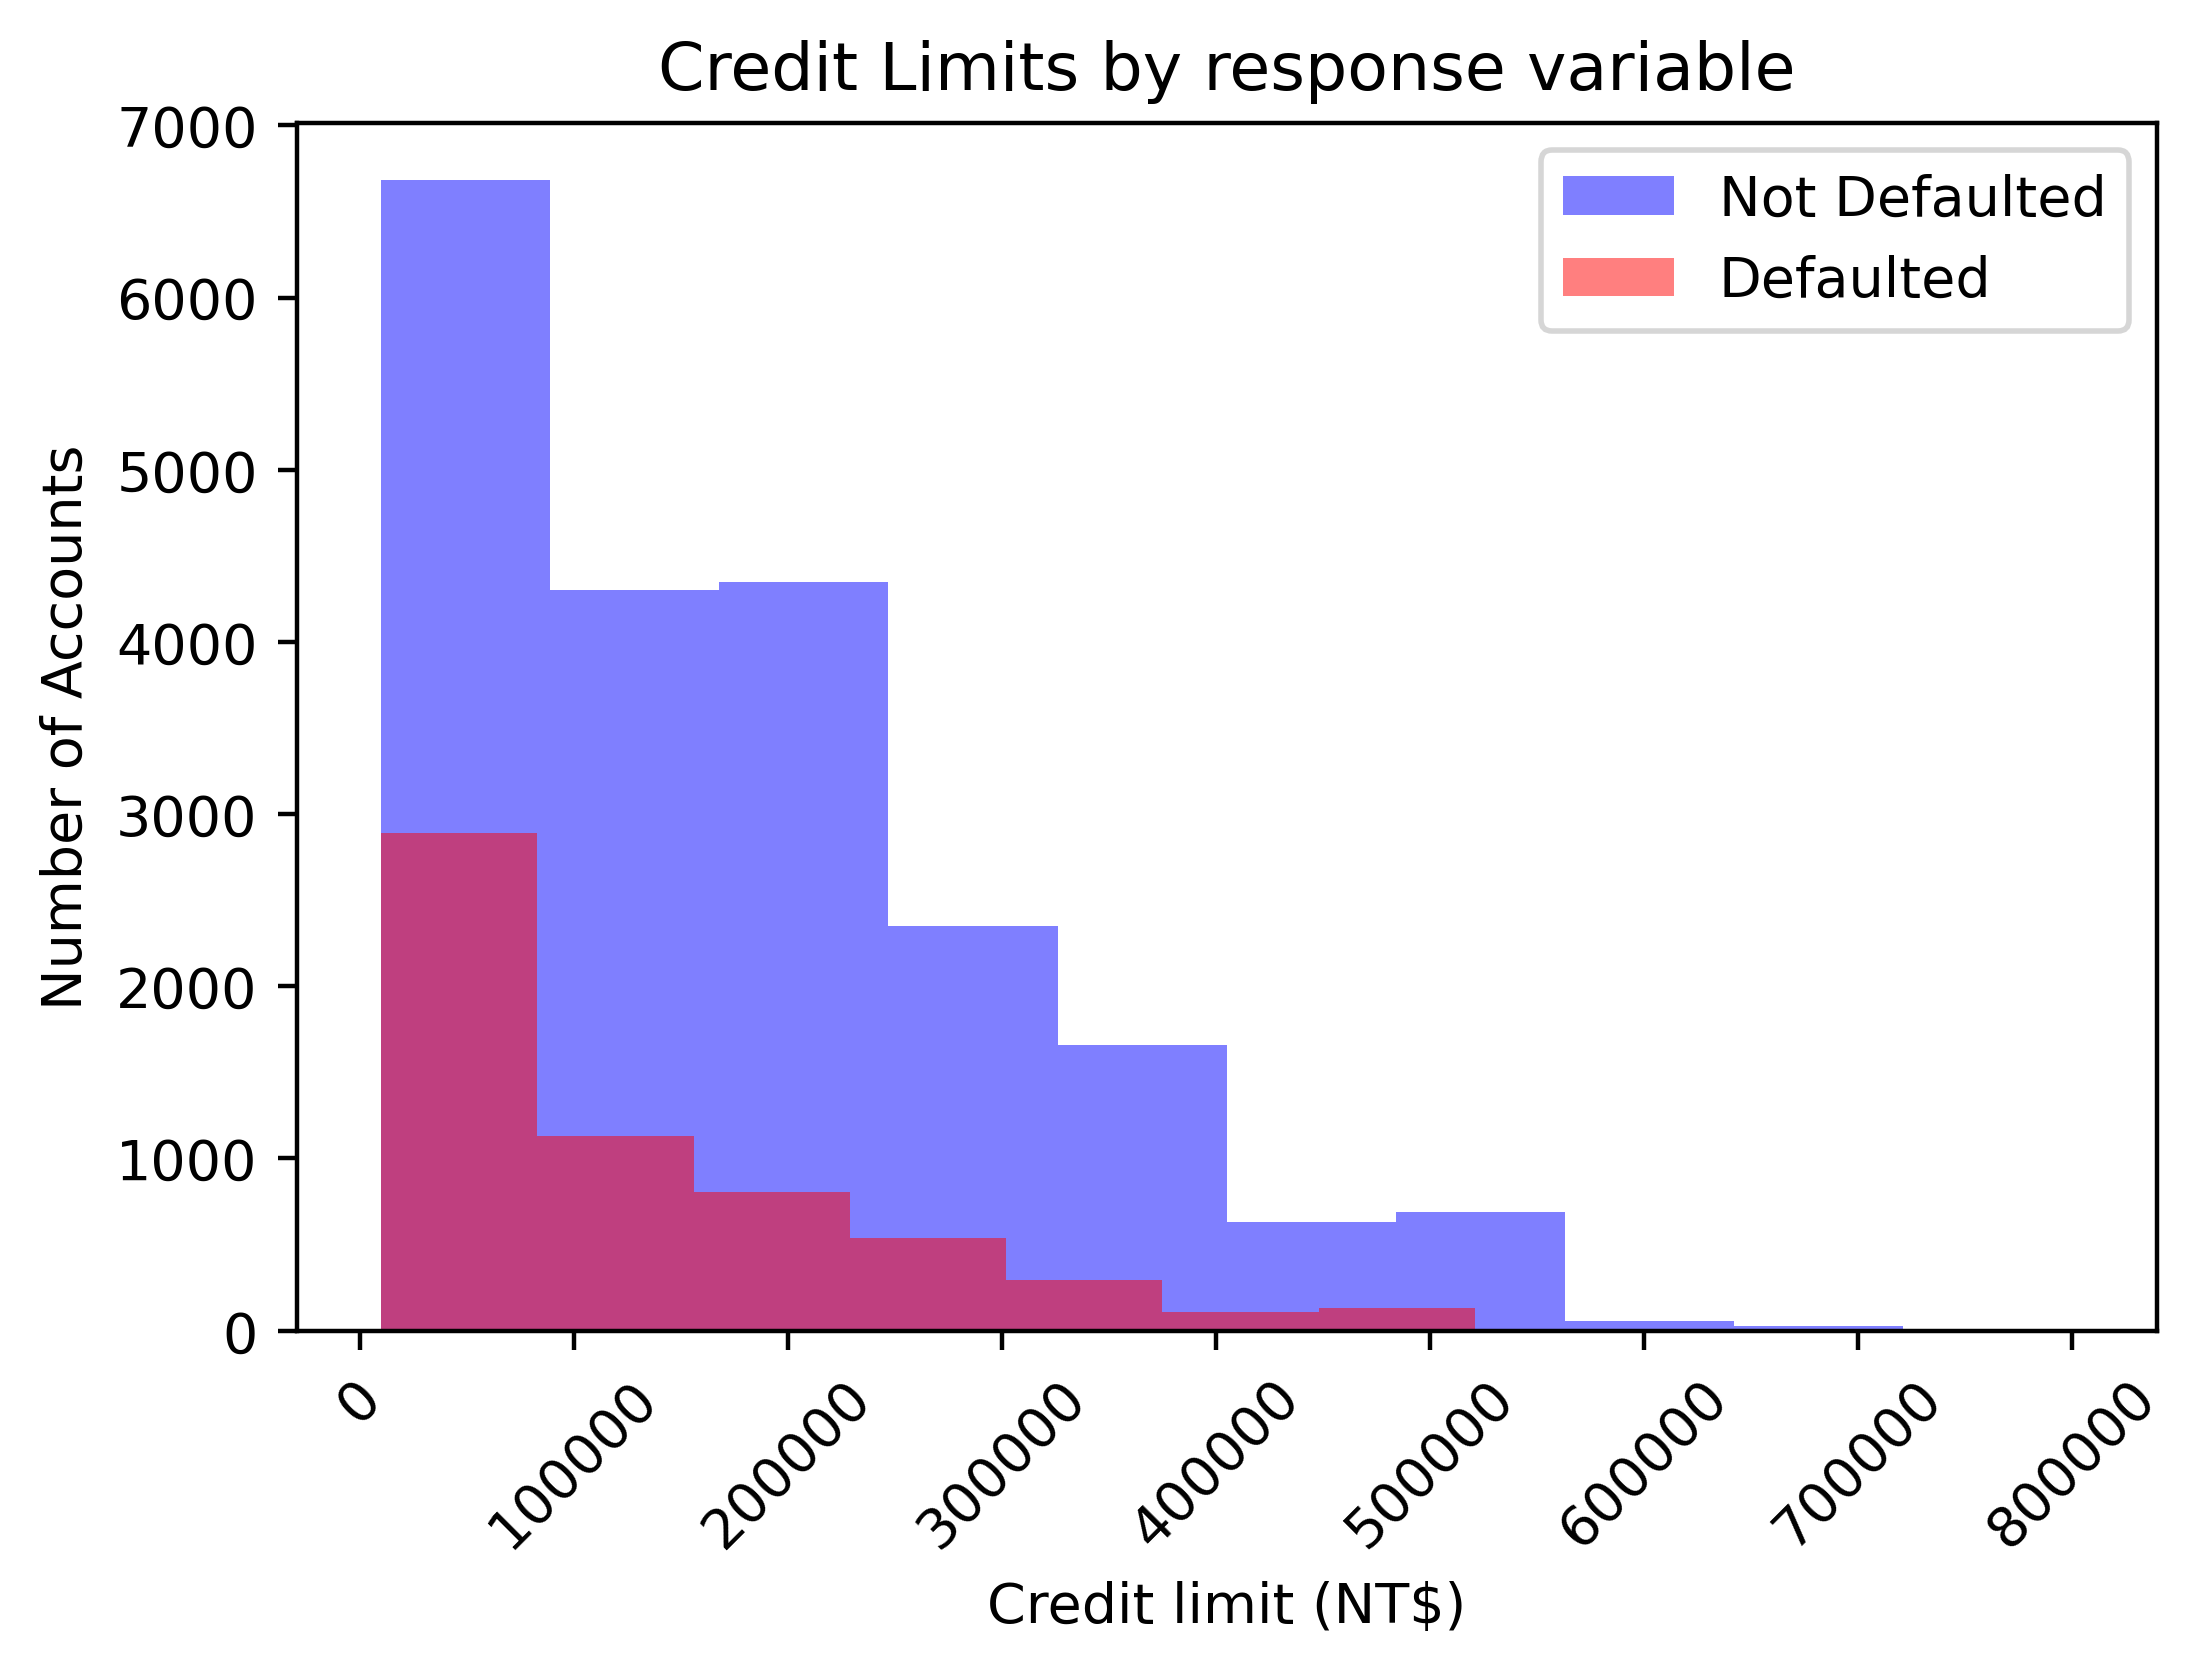

In [21]:
axes = plt.axes()
axes.hist(df.loc[neg_mask,"LIMIT_BAL"], alpha = 0.5, color = "blue")
axes.hist(df.loc[pos_mask, "LIMIT_BAL"], alpha = 0.5, color = "red")
axes.tick_params(axis = "x", labelrotation = 45)
axes.set_xlabel("Credit limit (NT$)")
axes.set_ylabel("Number of Accounts")
axes.legend(["Not Defaulted","Defaulted"])
axes.set_title("Credit Limits by response variable")

In [22]:
bin_edges = list(range(0,850000,50000))
print(bin_edges[-1])

800000


In [23]:
df["LIMIT_BAL"].max()

800000

<ipython-input-24-b6d953be9e2c>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes_2.set_yticklabels(np.round(y_ticks*50000,2))


Text(0.5, 1.0, 'Normalised Distribution of credit limits by response variable')

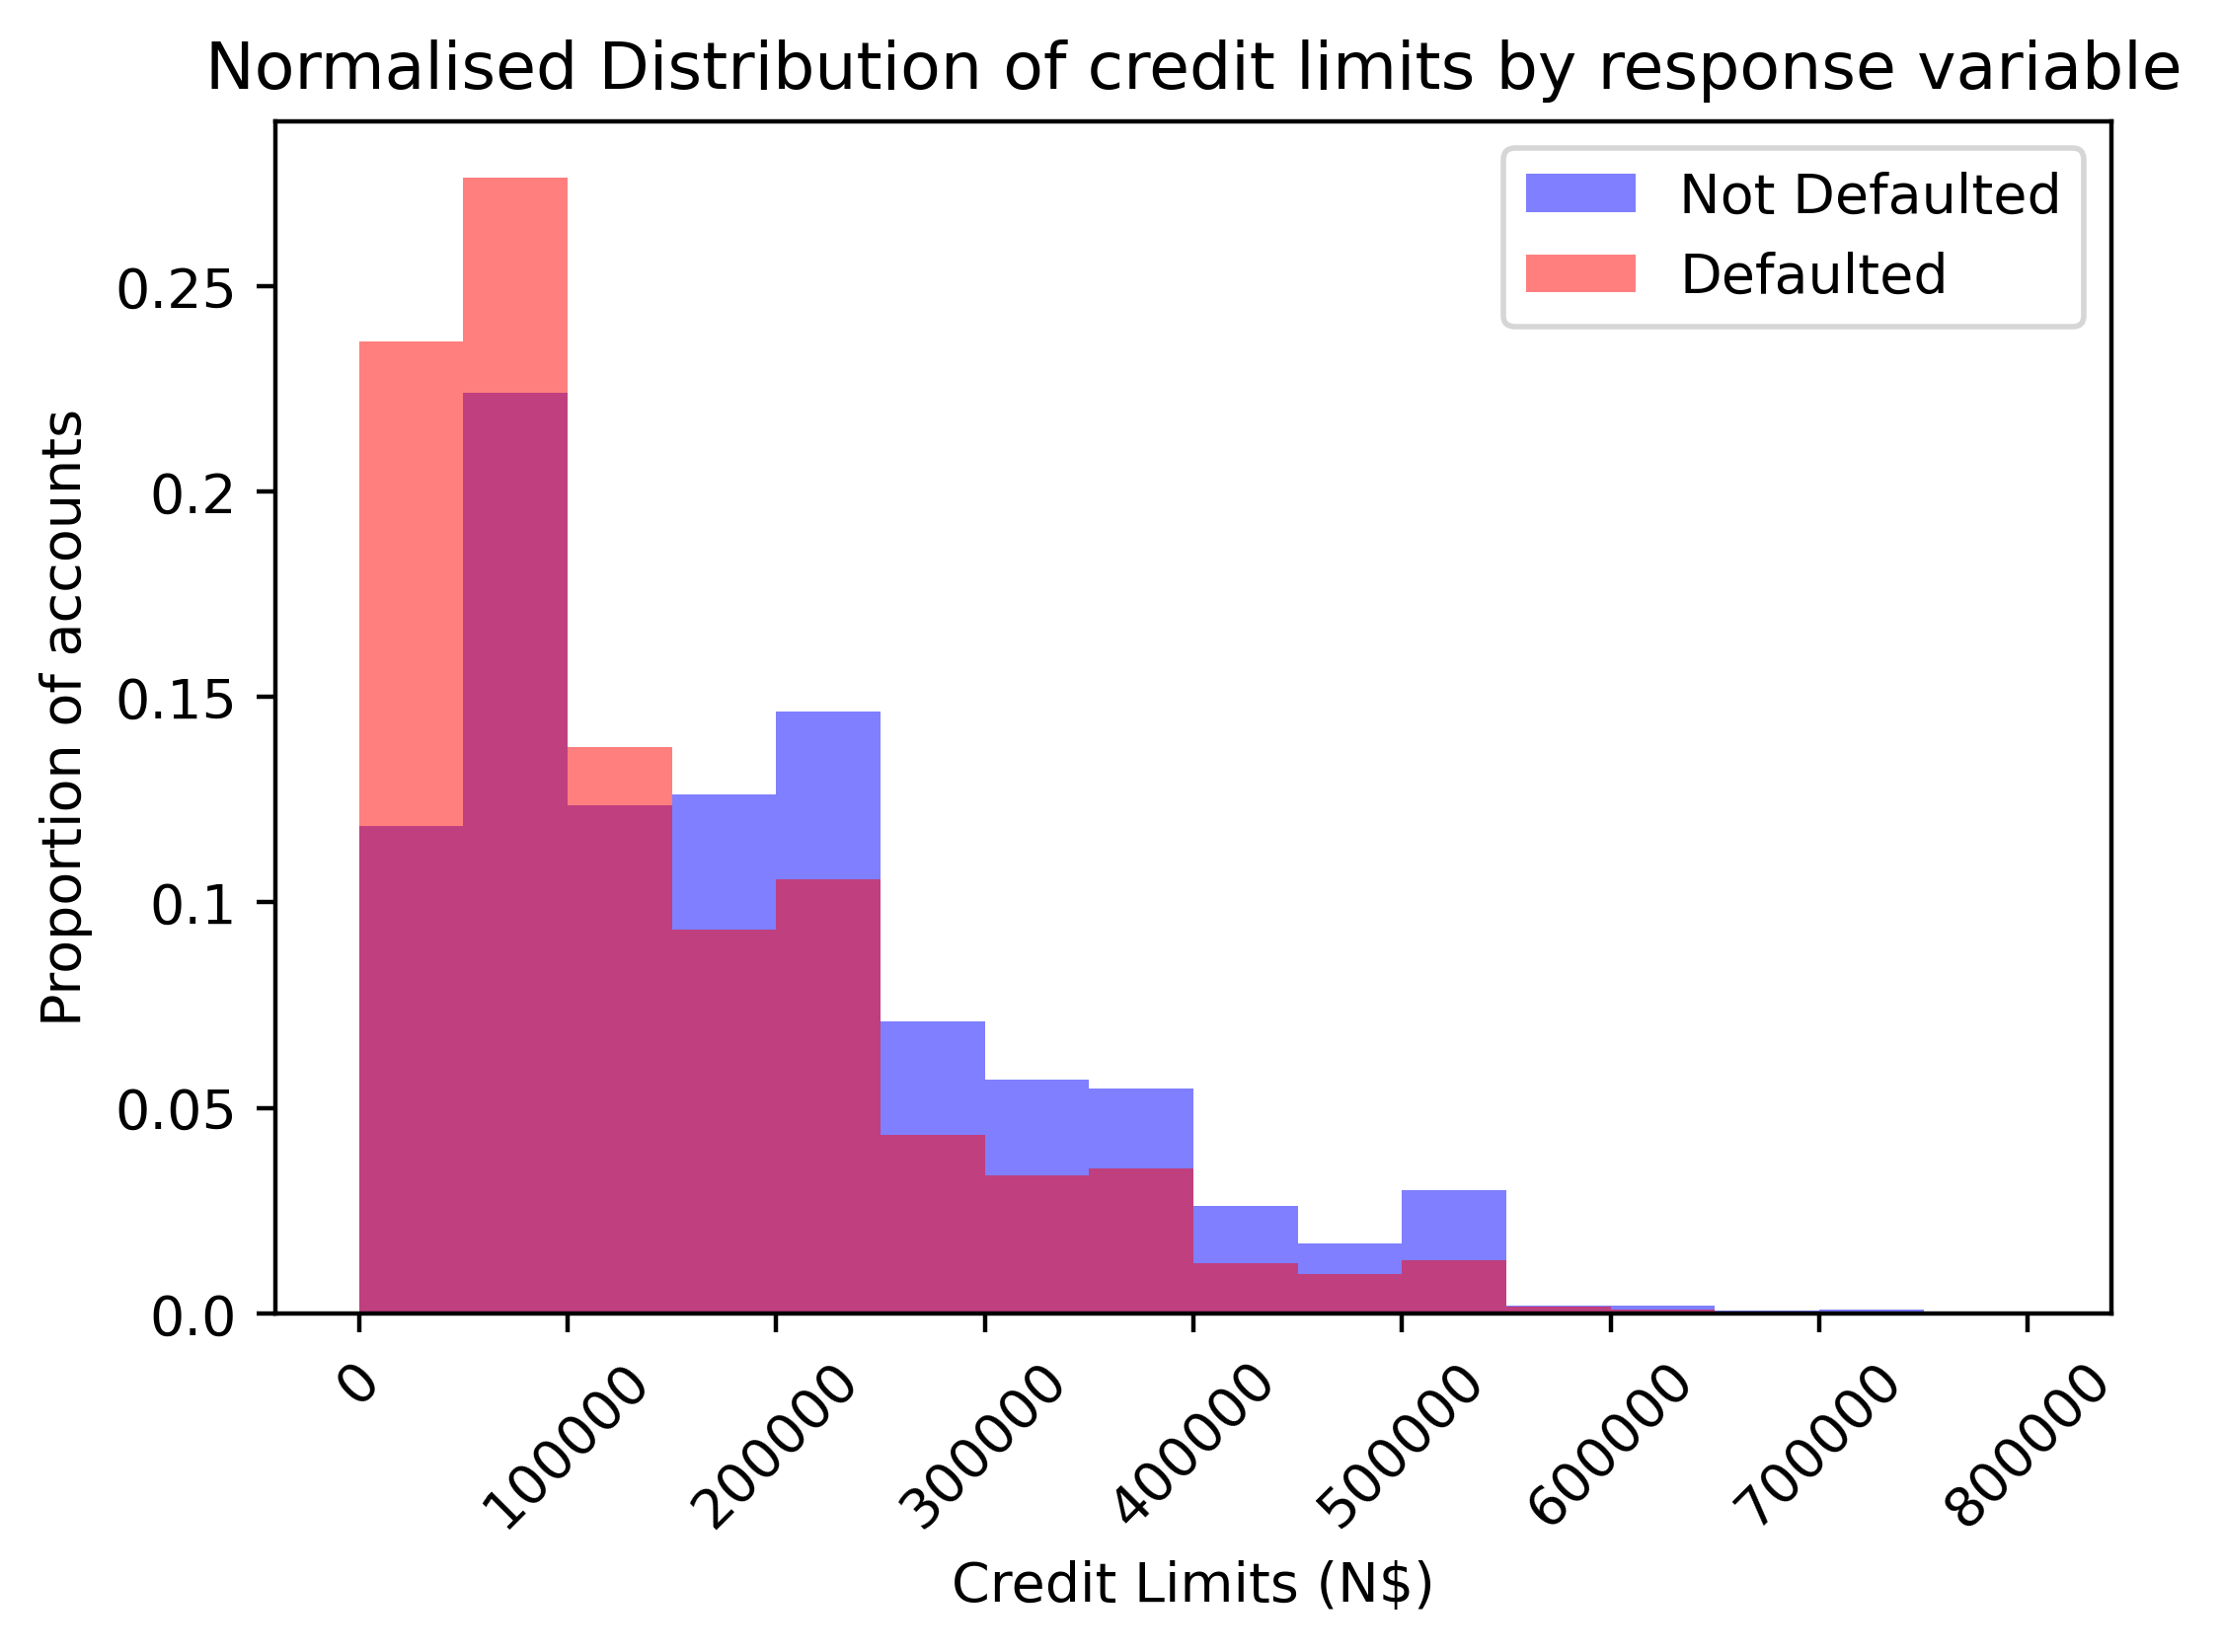

In [24]:
# Normalised Histogram
mpl.rcParams["figure.dpi"] = 400
axes_2 = plt.axes()
axes_2.hist(df.loc[neg_mask, "LIMIT_BAL"], bins = bin_edges, alpha = 0.5, density = True, color = "blue")
axes_2.hist(df.loc[pos_mask, "LIMIT_BAL"], bins = bin_edges, alpha = 0.5, density = True, color = "red")
axes_2.tick_params(axis = "x", labelrotation = 45)
axes_2.set_xlabel("Credit Limits (N$)")
axes_2.set_ylabel("Proportion of accounts")
y_ticks = axes_2.get_yticks()
axes_2.set_yticklabels(np.round(y_ticks*50000,2))
axes_2.legend(["Not Defaulted", "Defaulted"])
axes_2.set_title("Normalised Distribution of credit limits by response variable")

# Understanding Logistic Regression with Function Syntax

- Function Syntax in Python
- The Sigmoid Function and applications
 - Sigmoid(x) = 1 / (1 + $e^{-x}$)

In [25]:
def my_mean(input_argument):
    Output = sum(input_argument)/len(input_argument)
    return Output

In [26]:
my_mean(range(1,6))

3.0

In [27]:
np.exp(1)

2.718281828459045

In [28]:
X_exp = np.linspace(-4,4,81)

print(X_exp[:5])
print(X_exp[-5:])

[-4.  -3.9 -3.8 -3.7 -3.6]
[3.6 3.7 3.8 3.9 4. ]


Text(0.5, 1.0, 'Plot of $e^X$')

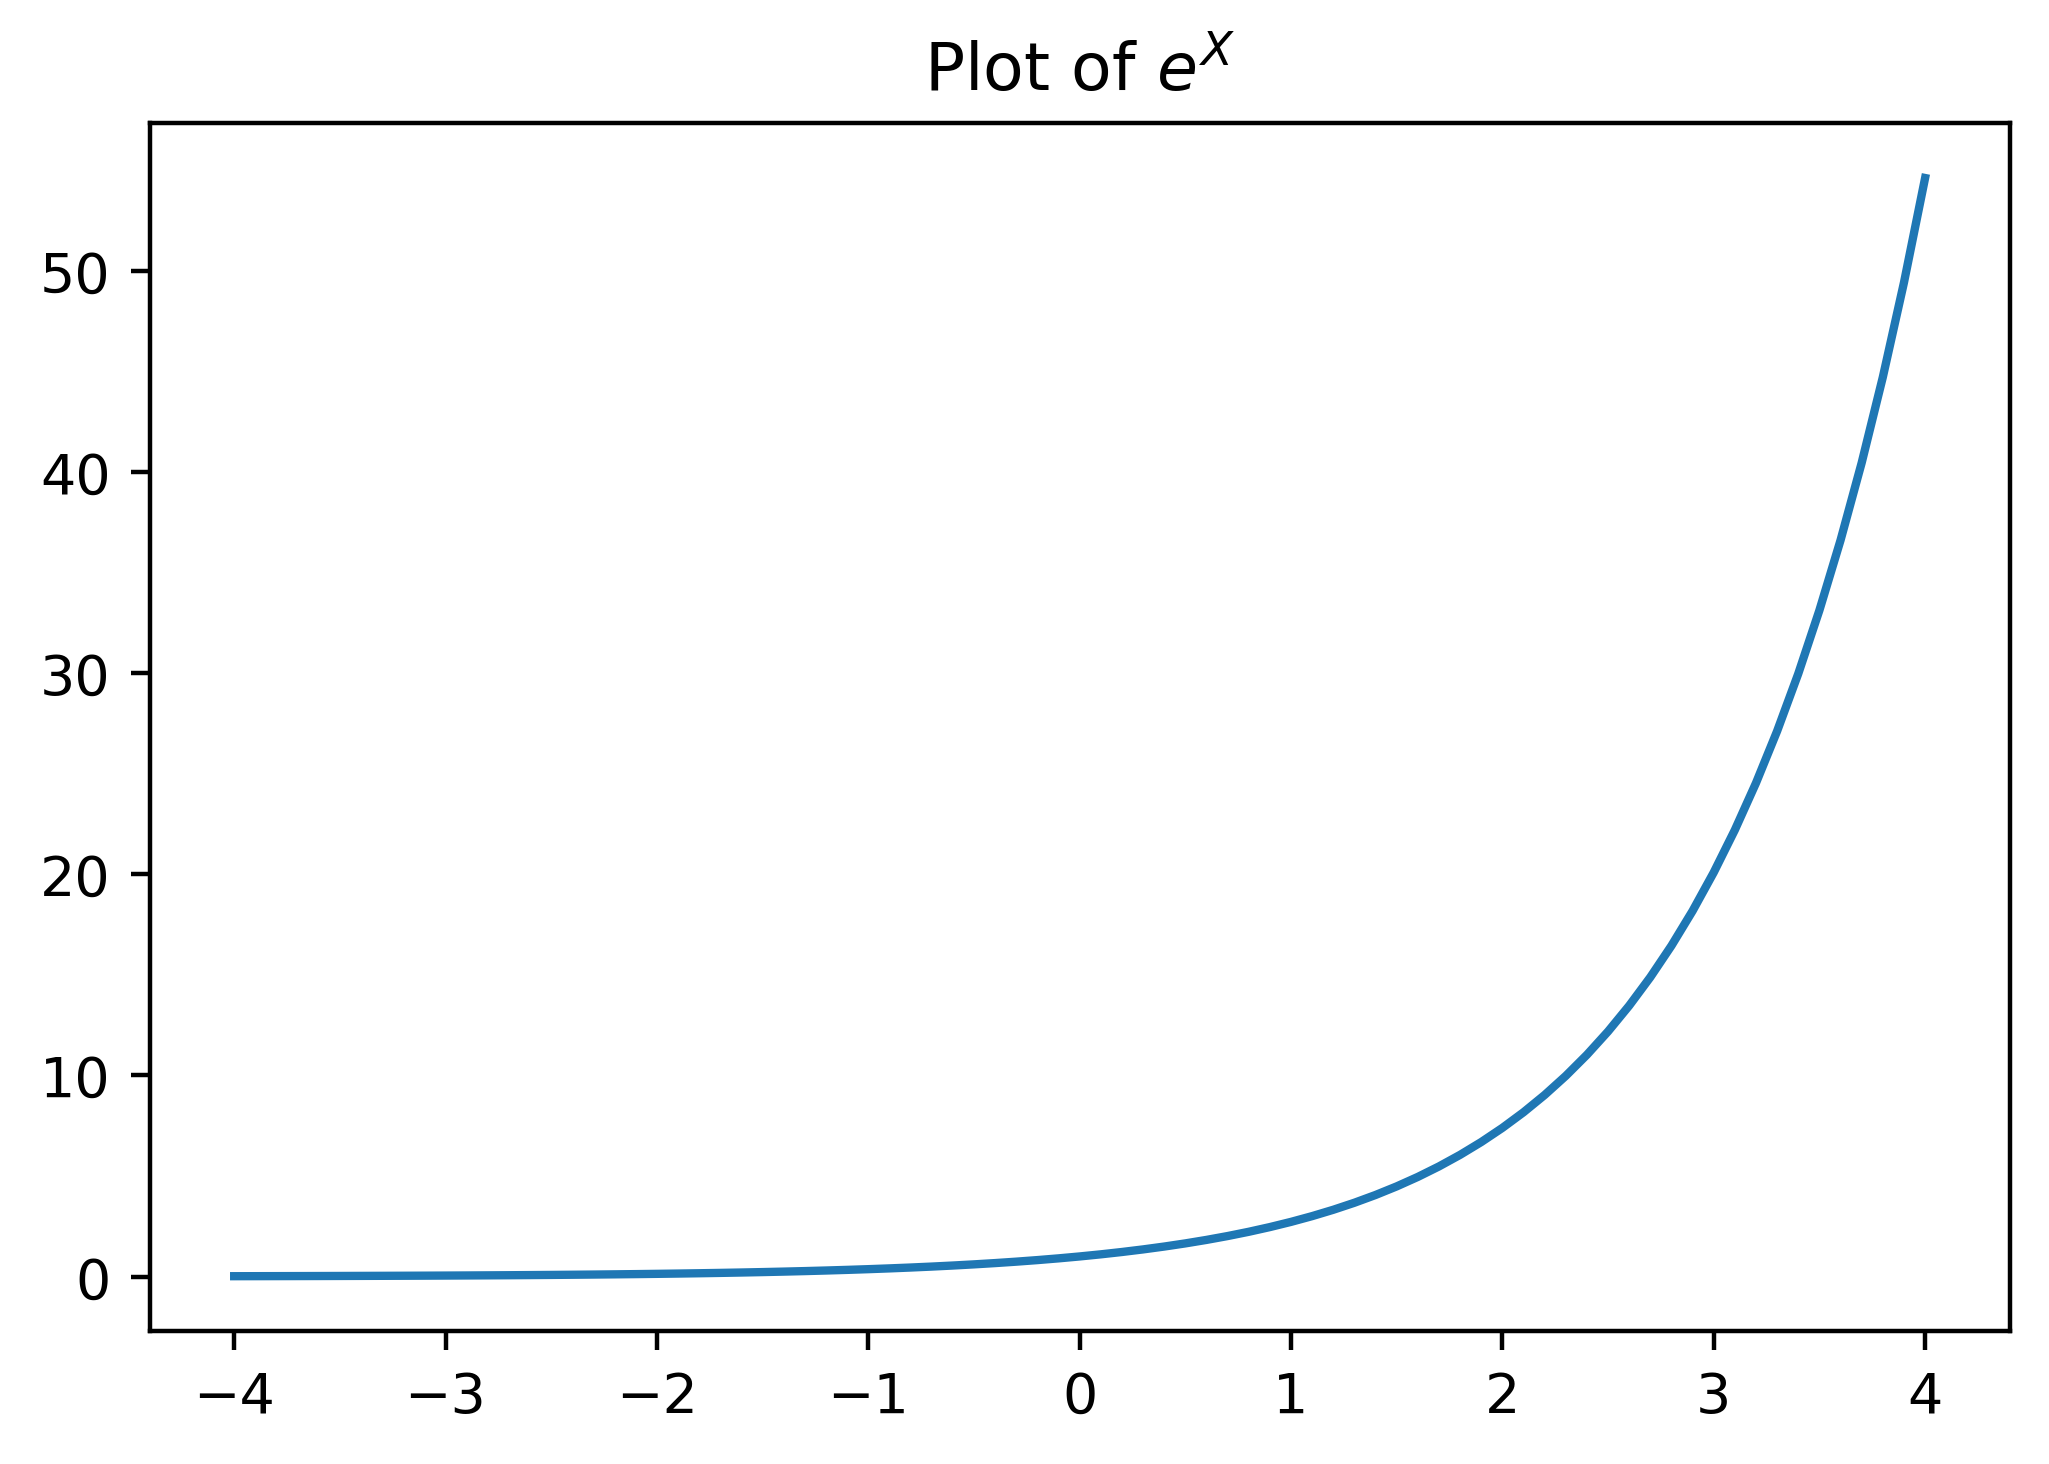

In [29]:
Y_exp = np.exp(X_exp)
plt.plot(X_exp, Y_exp, "-")
plt.title("Plot of $e^X$")

Text(0.5, 1.0, 'Plot of $e^{-X}$')

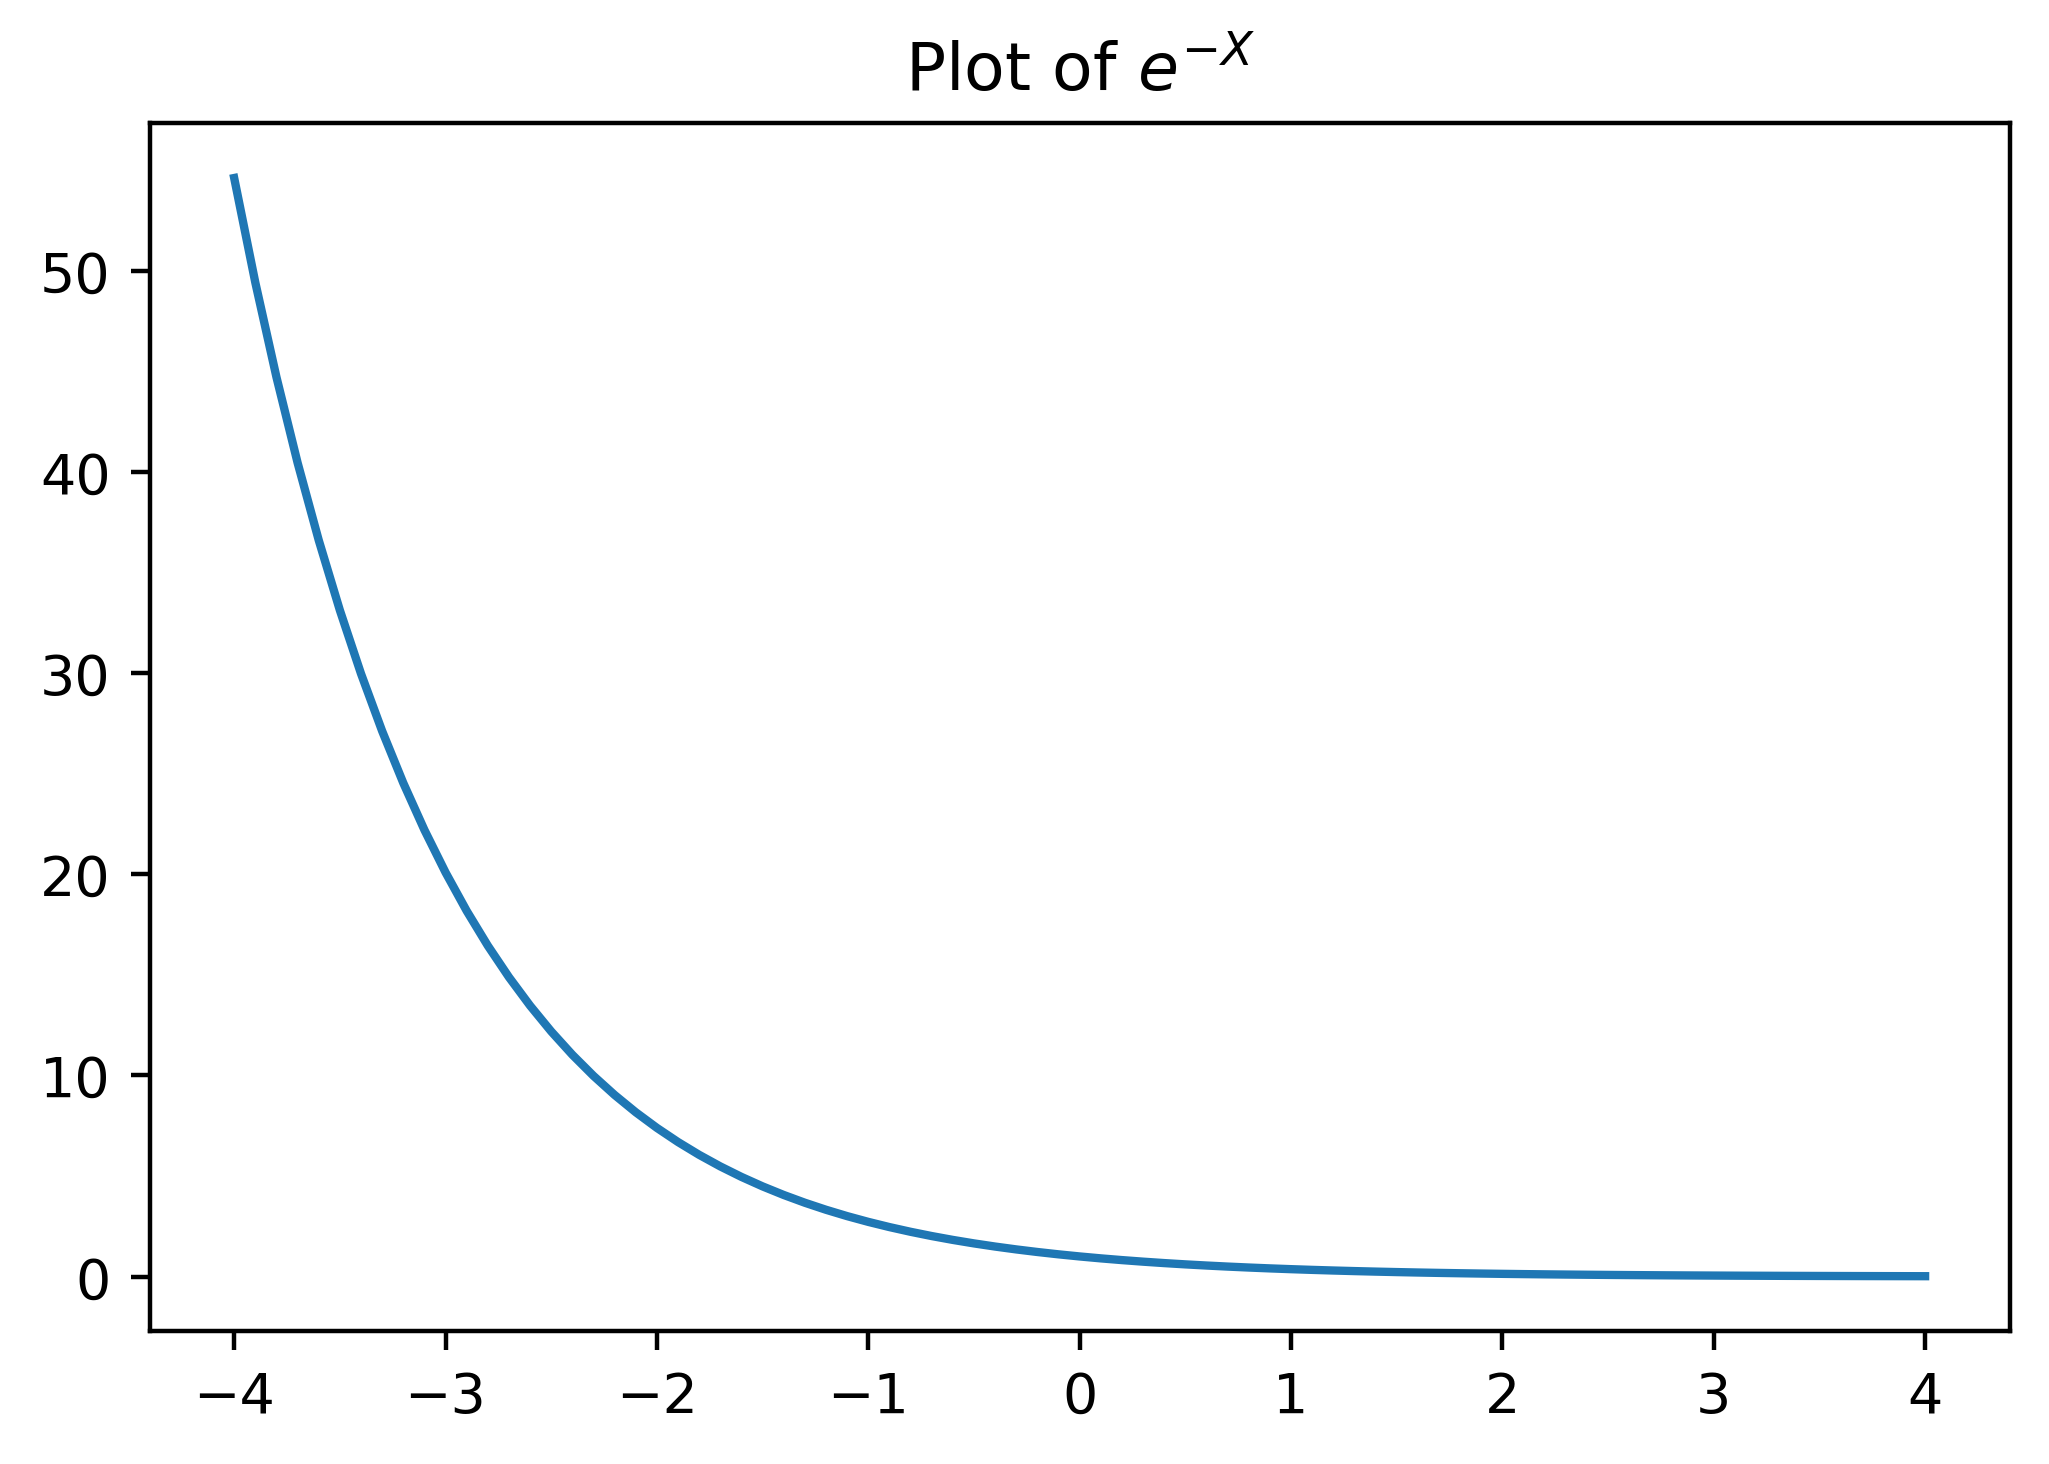

In [30]:
Y_exp = np.exp(-X_exp)
plt.plot(X_exp, Y_exp)
plt.title("Plot of $e^{-X}$")

In [31]:
def sigmoid(X):
    Y = 1 / (1 + np.exp(-X))
    return Y

# Exercise 14 - Examining the appropriatness of Features

In [32]:
group_by_pay_mean_y

,default payment next month
PAY_1,
-2,0.131664
-1,0.170002
0,0.128295
1,0.336400
2,0.694701
3,0.773973
4,0.682540
5,0.434783
6,0.545455


In [33]:
p = group_by_pay_mean_y["default payment next month"].values
q = 1 - p
print(p)
print(q)

[0.13166397 0.17000198 0.12829525 0.33639988 0.69470143 0.7739726
 0.68253968 0.43478261 0.54545455 0.77777778 0.58823529]
[0.86833603 0.82999802 0.87170475 0.66360012 0.30529857 0.2260274
 0.31746032 0.56521739 0.45454545 0.22222222 0.41176471]


In [34]:
odds_ratio = p / q
odds_ratio

array([0.15162791, 0.20482215, 0.14717742, 0.50693161, 2.27548209,
       3.42424242, 2.15      , 0.76923077, 1.2       , 3.5       ,
       1.42857143])

In [35]:
log_odds = np.log(odds_ratio)
log_odds

array([-1.88632574, -1.58561322, -1.91611649, -0.67937918,  0.82219194,
        1.23088026,  0.76546784, -0.26236426,  0.18232156,  1.25276297,
        0.35667494])

In [36]:
group_by_pay_mean_y.index

Int64Index([-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64', name='PAY_1')

In [38]:
np.random.seed(seed = 6)
X_1_pos = np.random.uniform(low = 1, high = 7, size = (20,1))
X_1_neg = np.random.uniform(low = 3, high = 10, size = (20,1))
X_2_pos = np.random.uniform(low = 1, high = 7, size = (20,1))
X_2_neg = np.random.uniform(low = 3, high = 10, size = (20,1))

[[6.35716091]
 [2.99187883]
 [5.92737474]]


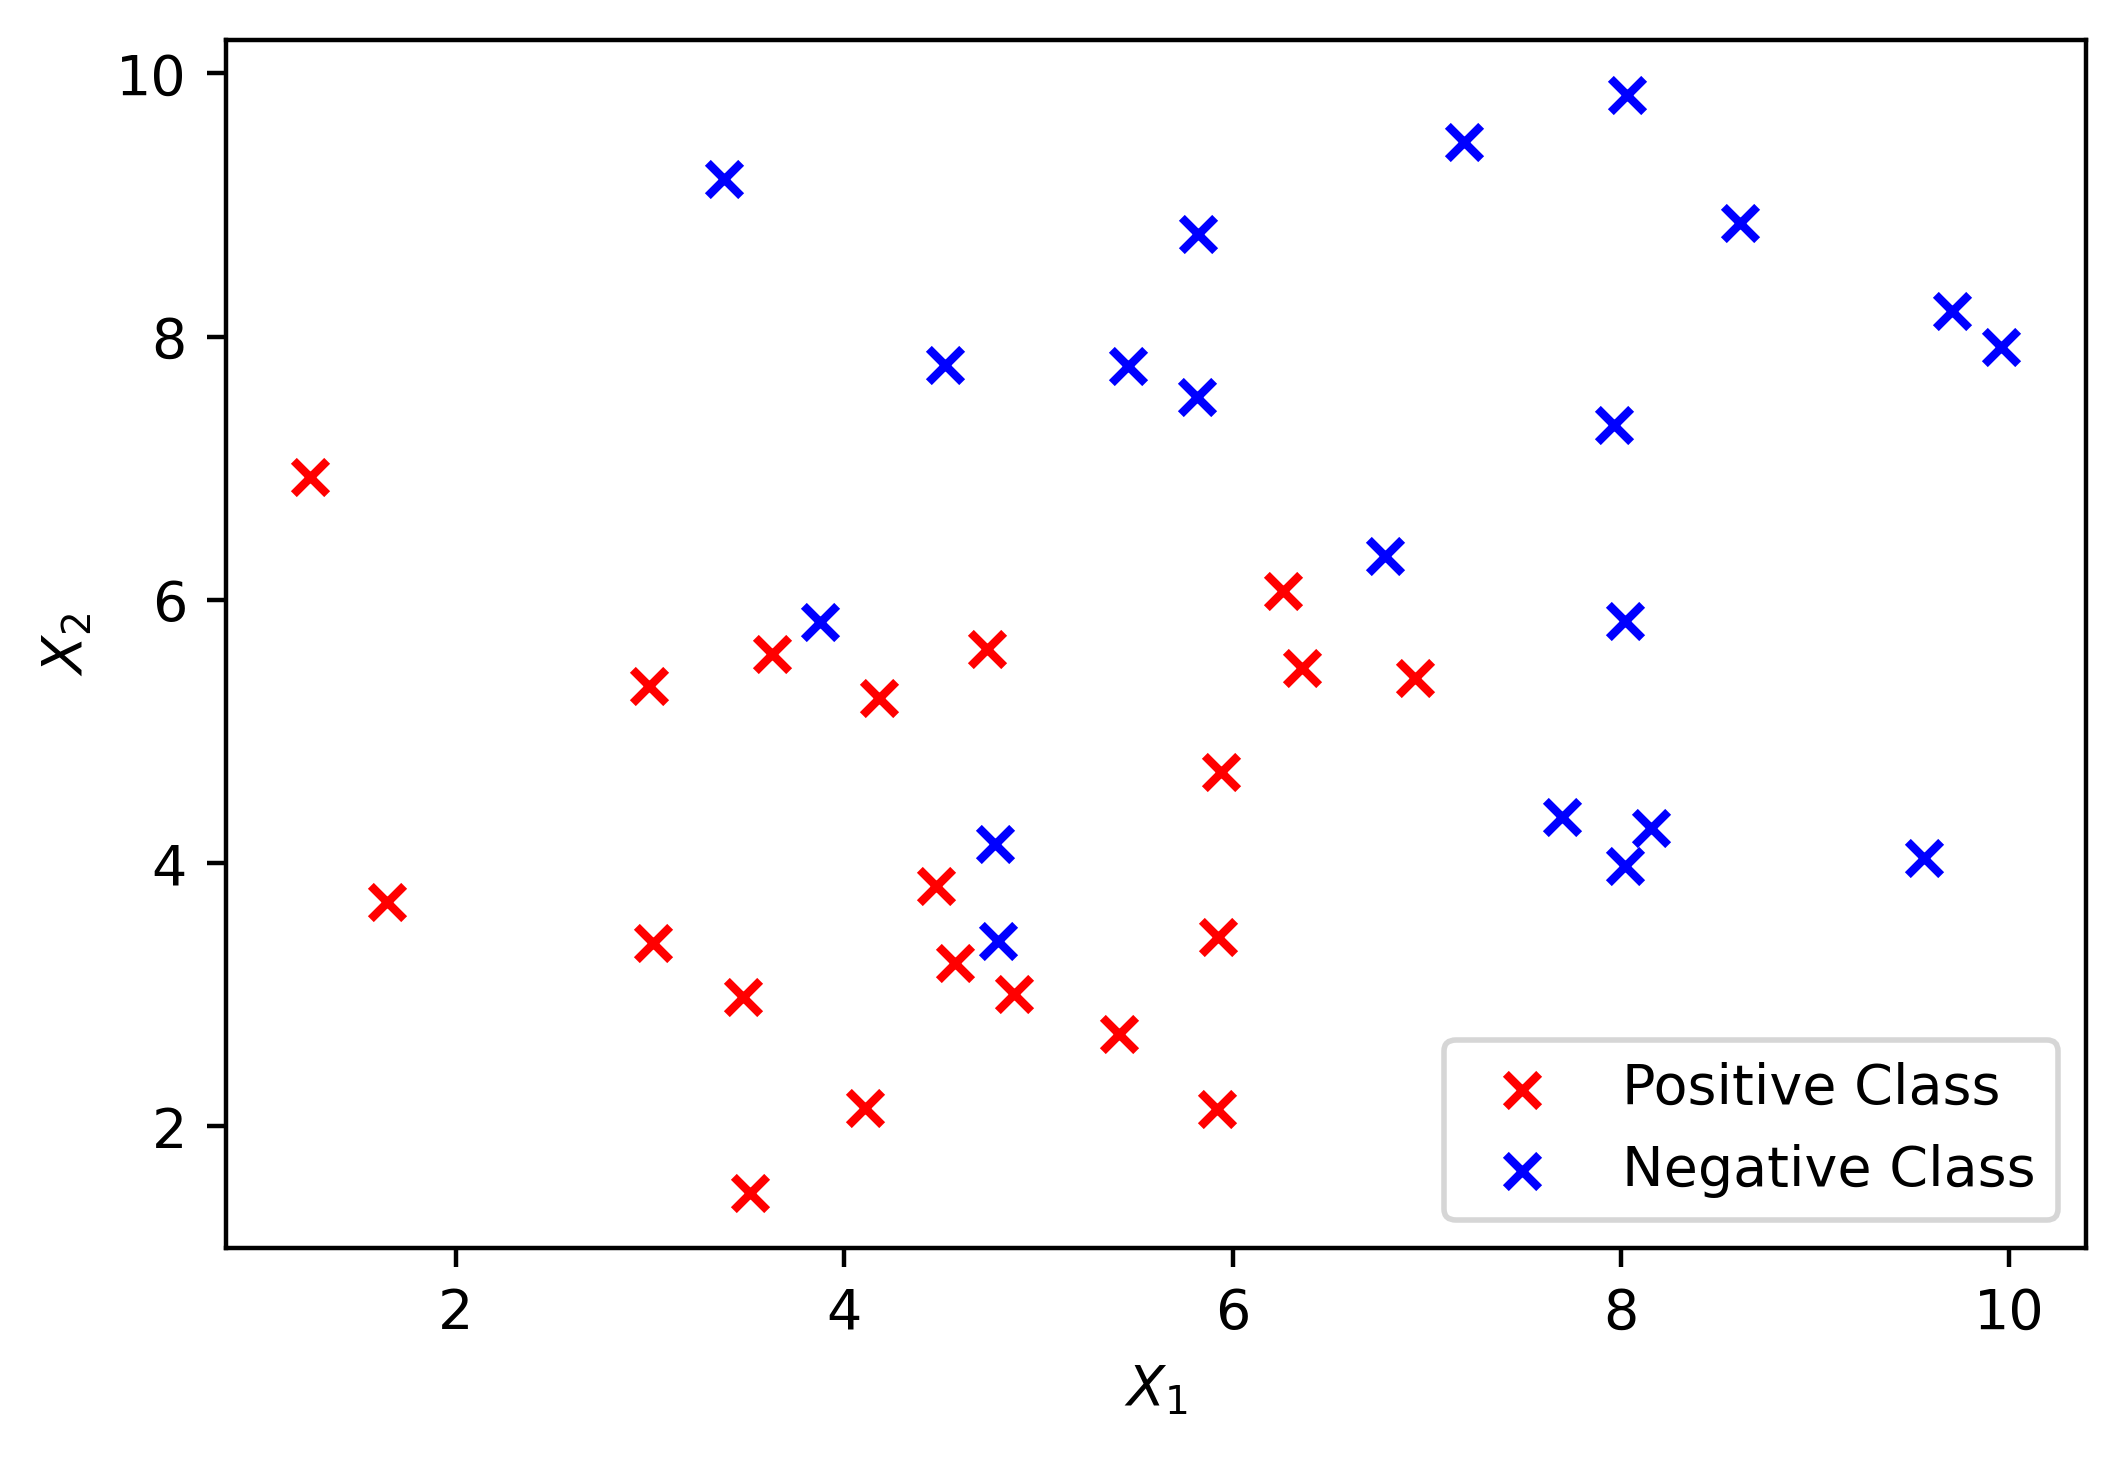

In [39]:
plt.scatter(X_1_pos, X_2_pos, color = "red", marker = "x")
plt.scatter(X_1_neg, X_2_neg, color = "blue", marker = "x")
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.legend(["Positive Class", "Negative Class"])

In [42]:
X = np.block([[X_1_pos,X_2_pos], [X_1_neg, X_2_neg]])
print(X.shape)
print(X[0:3])

(40, 2)
[[6.35716091 5.4790643 ]
 [2.99187883 5.3444234 ]
 [5.92737474 3.43664678]]


In [46]:
y = np.vstack((np.ones((20,1)), np.zeros((20,1)))).reshape(40,)
y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.])

In [50]:
from sklearn.linear_model import LogisticRegression
example_lr = LogisticRegression(solver = "liblinear")
example_lr.fit(X,y)

LogisticRegression(solver='liblinear')

In [62]:
y_pred = example_lr.predict(X)
positive_indices = [counter for counter in range(len(y_pred)) if y_pred[counter] == 1]
negative_indices = [counter for counter in range(len(y_pred)) if y_pred[counter] == 0]

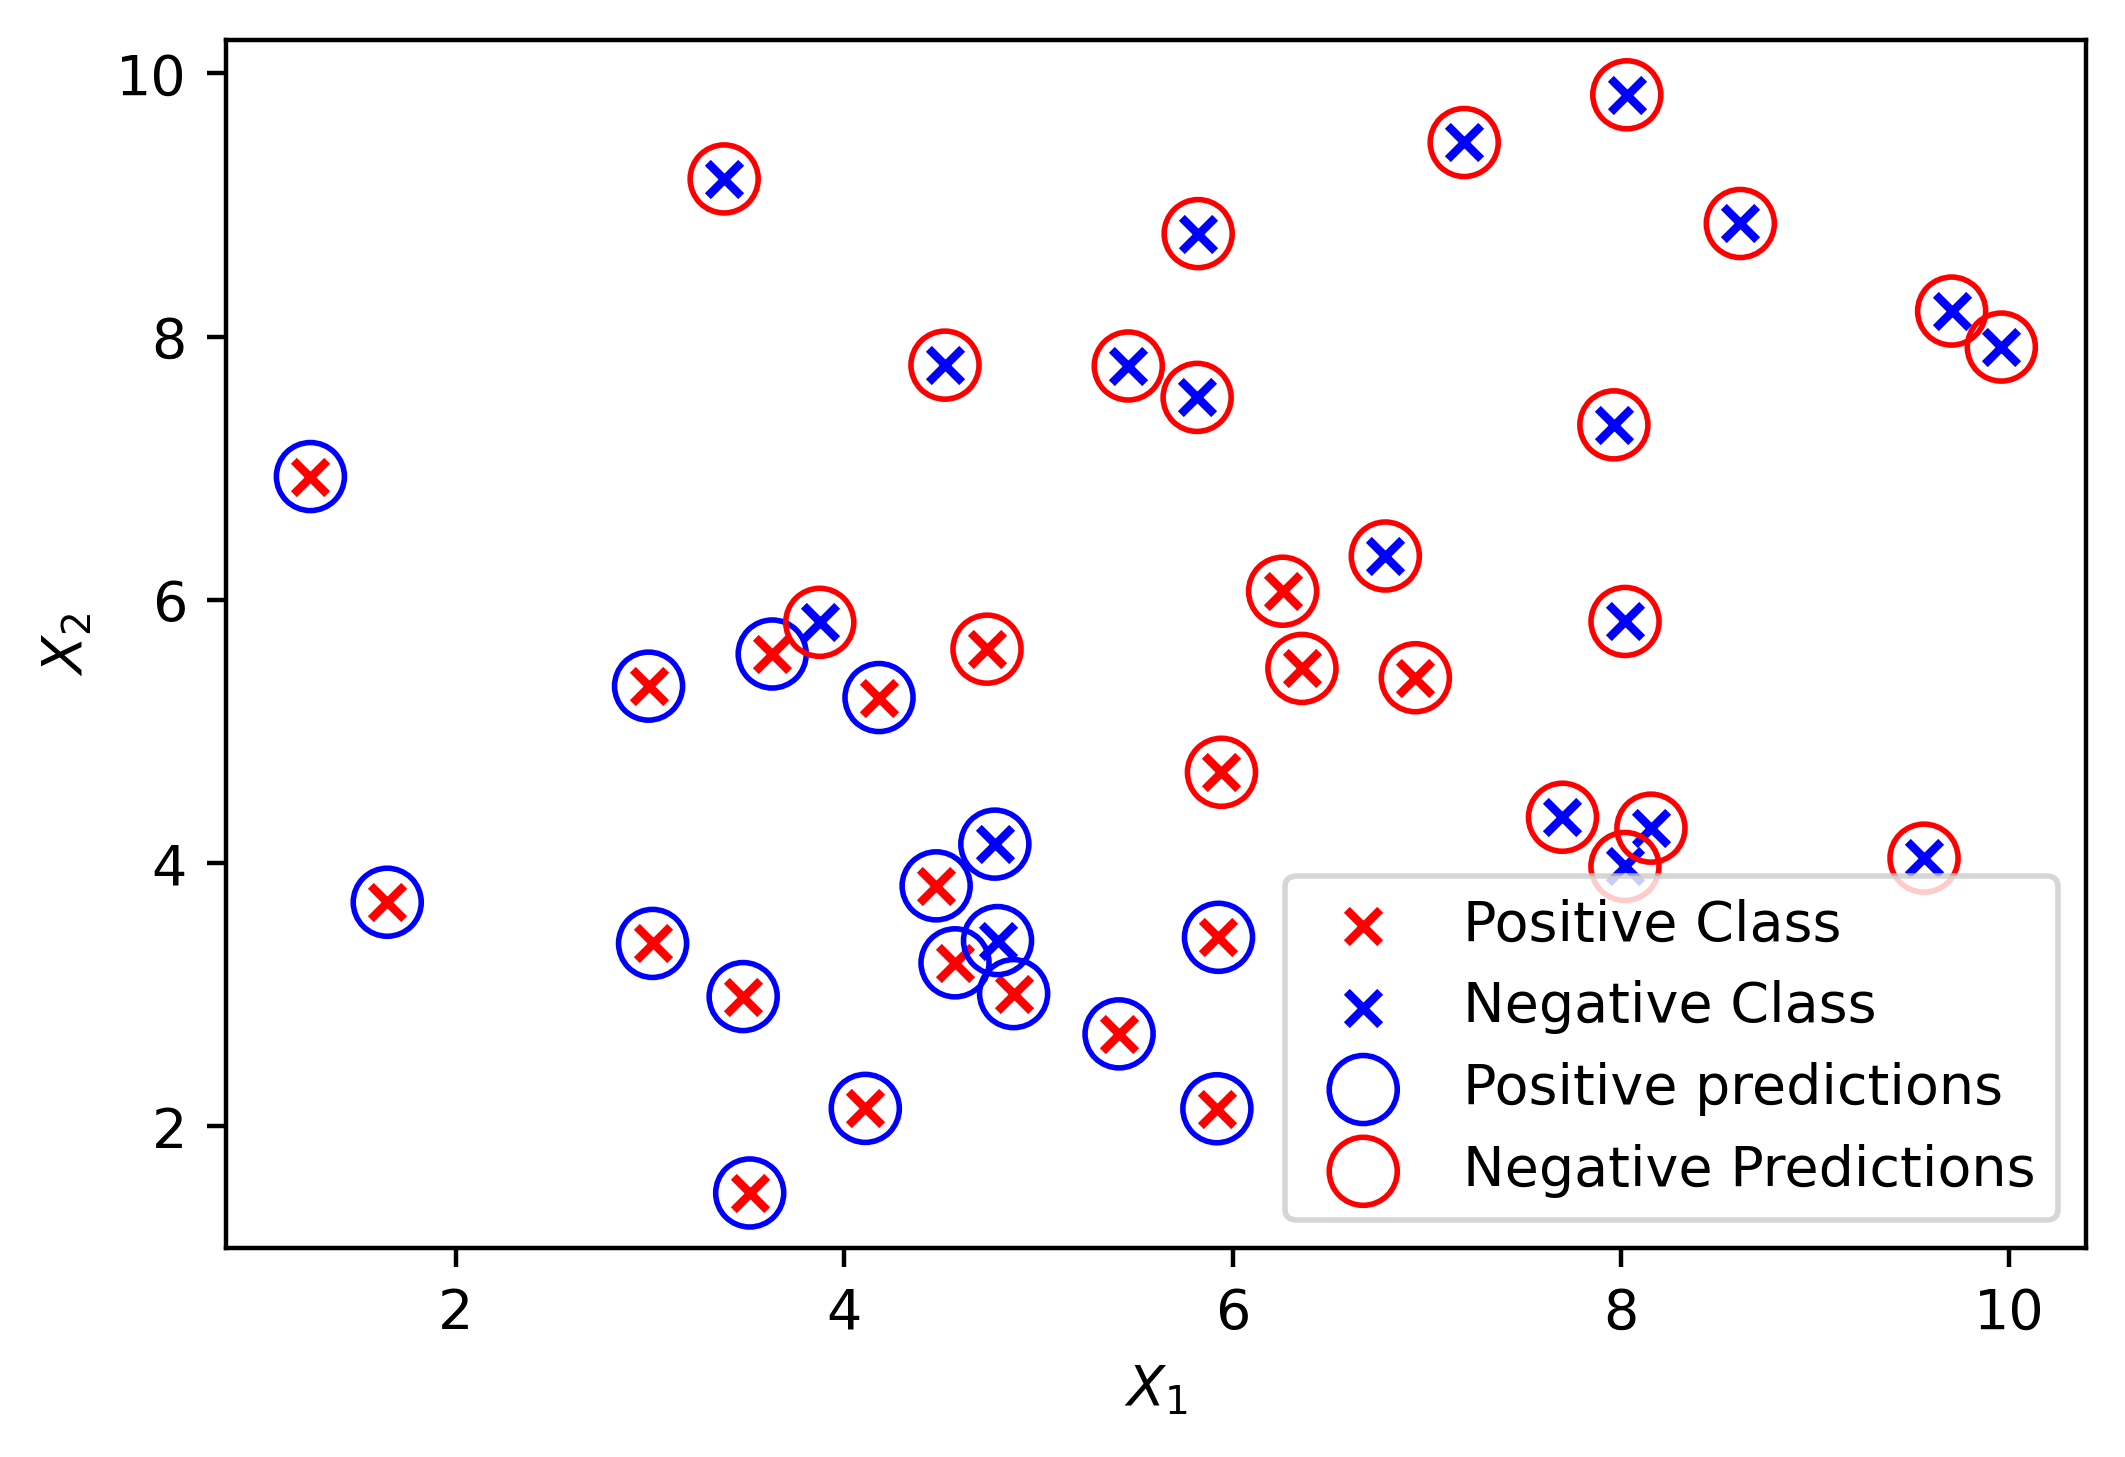

In [63]:
plt.scatter(X_1_pos, X_2_pos, color = "red", marker = "x")
plt.scatter(X_1_neg, X_2_neg, color = "blue", marker = "x")
plt.scatter(X[positive_indices,0], X[positive_indices,1], s = 150, marker = "o", edgecolors = "blue", facecolors = "none")
plt.scatter(X[negative_indices, 0], X[negative_indices,1], s = 150, marker = "o", edgecolors = "red", facecolors = "none")
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.legend(["Positive Class", "Negative Class", "Positive predictions", "Negative Predictions"])

In [66]:
theta_0 = example_lr.intercept_
theta_1 = example_lr.coef_[0][0]
theta_2 = example_lr.coef_[0][1]
print(theta_0, theta_1, theta_2)

[2.25479161] -0.20245058016285838 -0.25336423626773225


In [73]:
X_1_decision_boundary = np.linspace(0,10,11)
X_2_decision_boundary = - (theta_1/theta_2)*X_1_decision_boundary - (theta_0/theta_2)

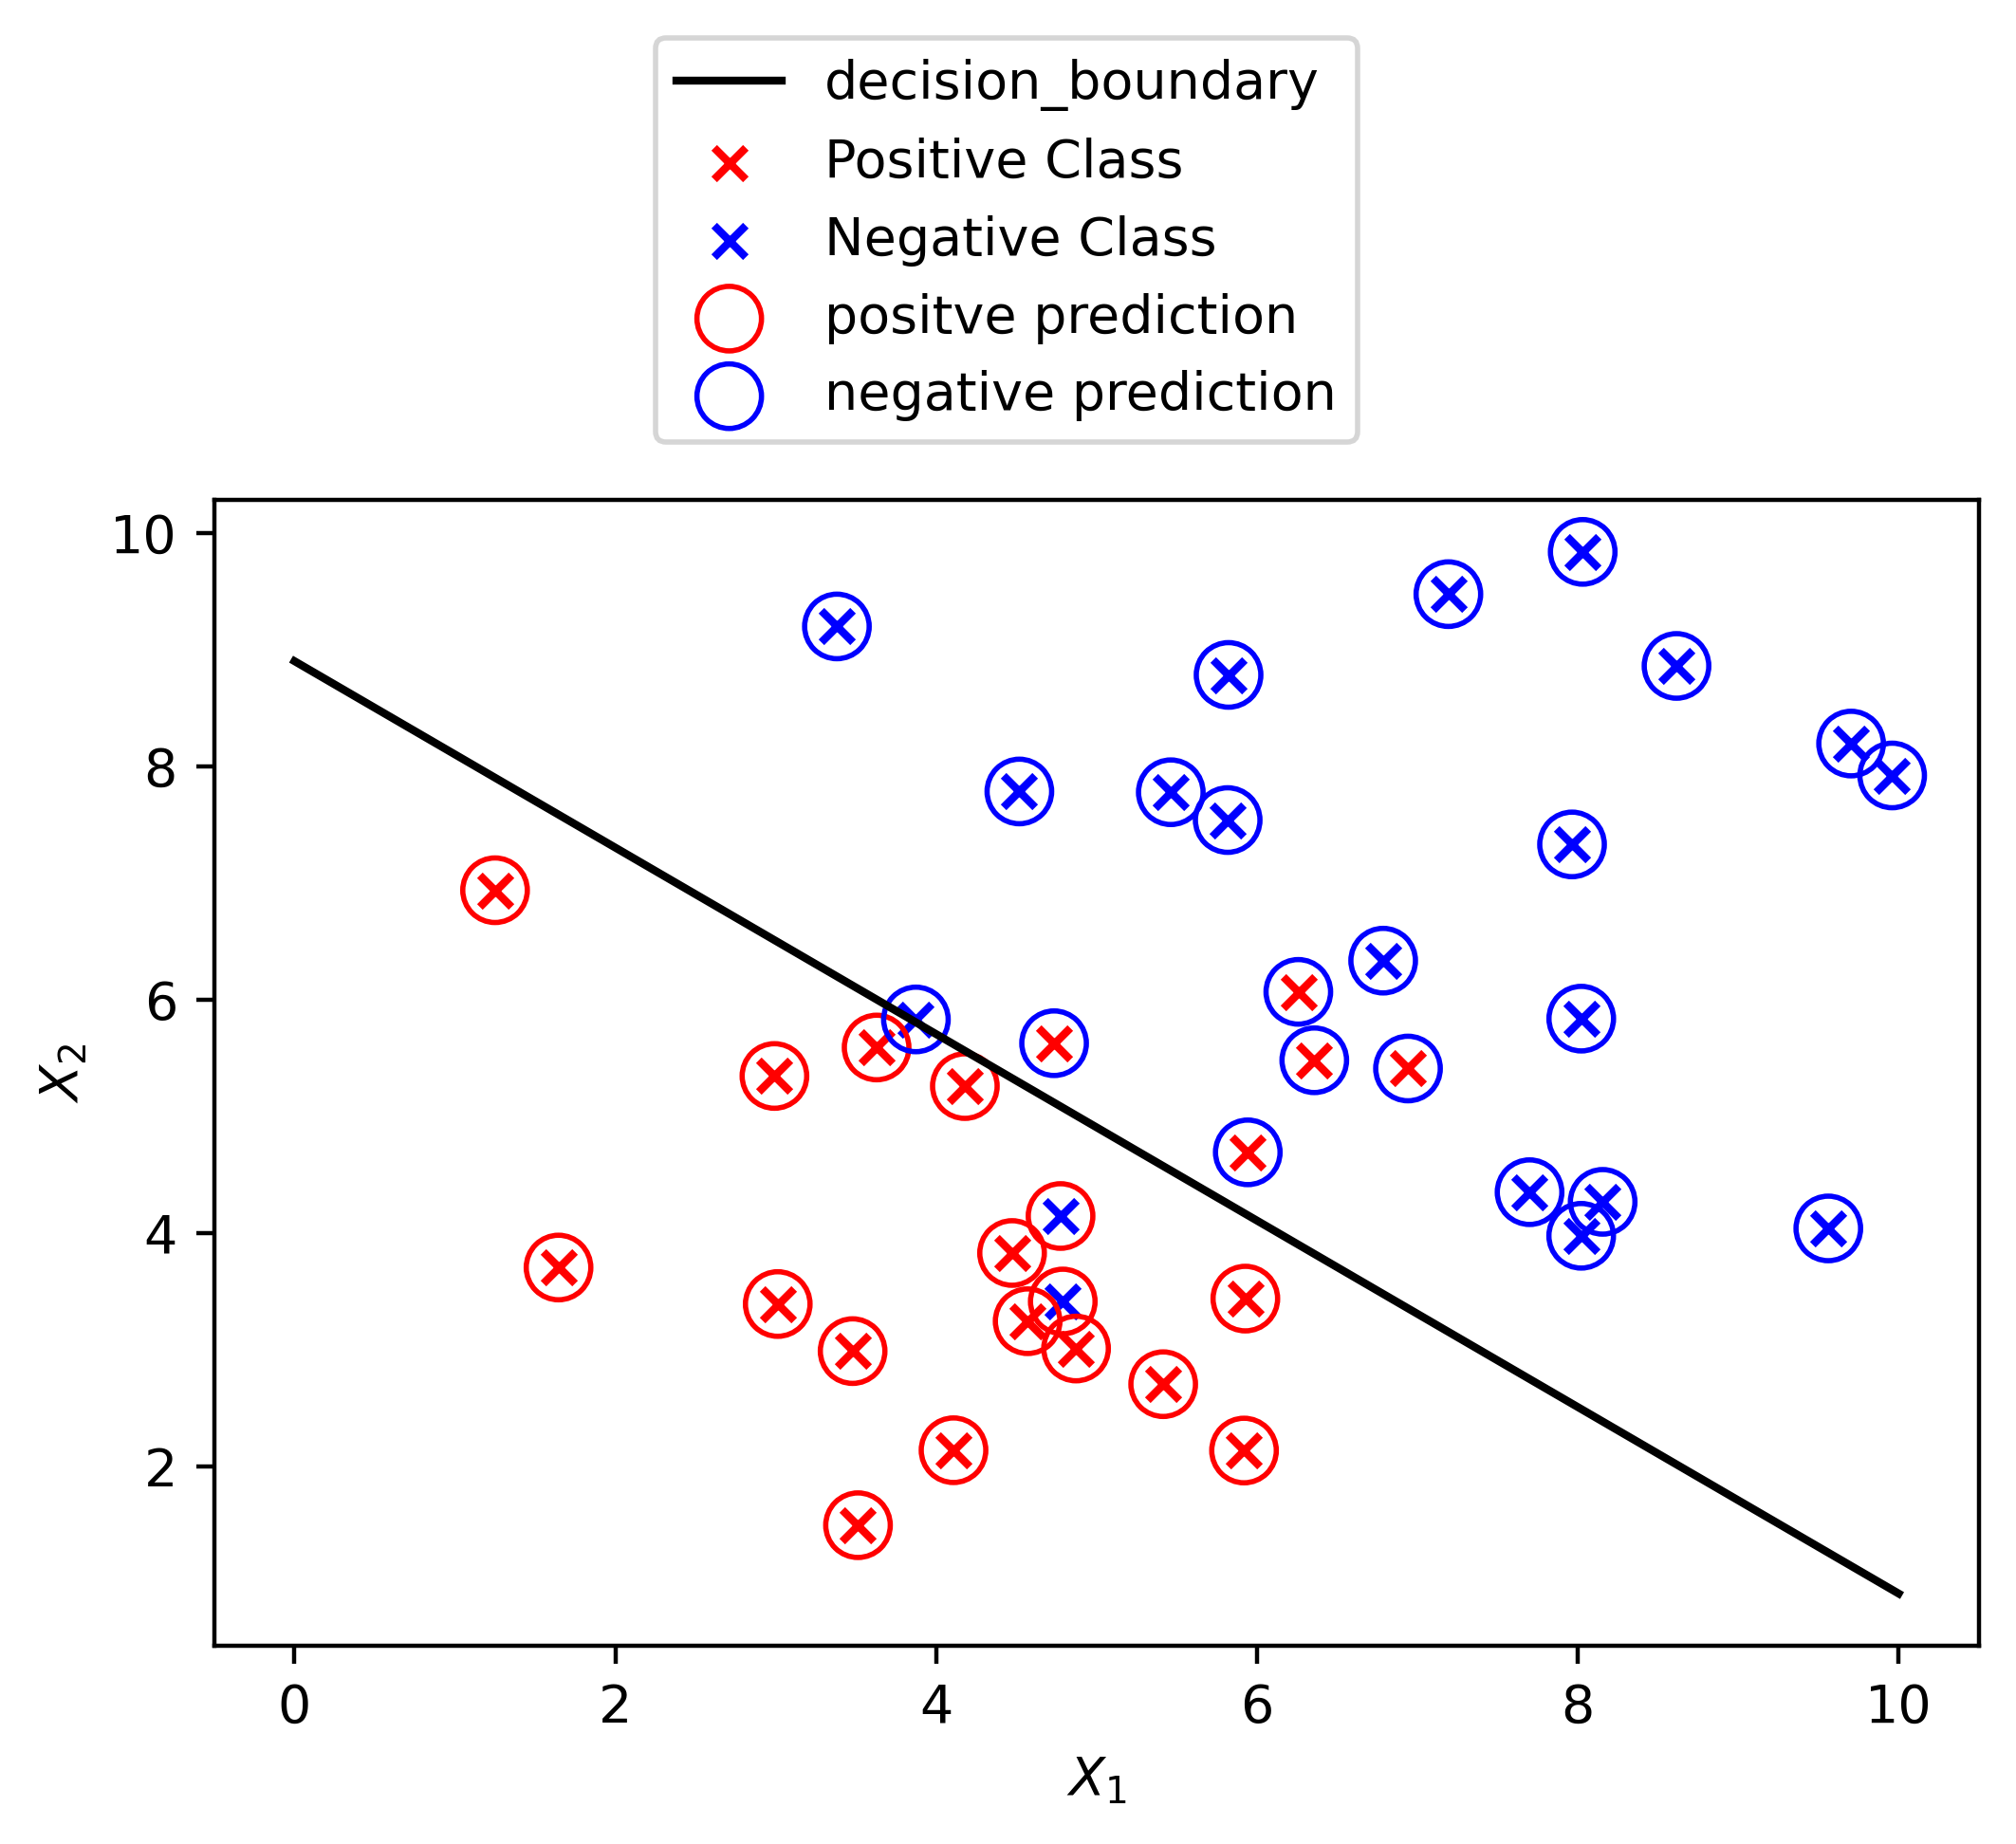

In [76]:
pos_true = plt.scatter(X_1_pos, X_2_pos, color = "red", marker = "x", label = "Positive Class")
neg_true = plt.scatter(X_1_neg, X_2_neg, color = "blue", marker = "x", label = "Negative Class")
pos_pred = plt.scatter(X[positive_indices,0], X[positive_indices, 1], s = 150, marker = "o", label = "positve prediction", edgecolor = "red", facecolor = "none")
neg_pred = plt.scatter(X[negative_indices,0], X[negative_indices, 1], s = 150, marker = "o", label = "negative prediction", edgecolor = "blue", facecolor = "none")
dec = plt.plot(X_1_decision_boundary, X_2_decision_boundary, "k-", label = "decision_boundary")
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.legend(loc =[0.25,1.05])

# Activity 3

In [97]:
X = df[["PAY_1", "LIMIT_BAL"]].values
y = df["default payment next month"].values

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.2, random_state = 24)

In [101]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver = "liblinear")
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [110]:
y_pred = model.predict(X_test)
y_pred_probability = model.predict_proba(X_test)

array([[     2, 160000],
       [     1,  50000],
       [    -1, 200000],
       ...,
       [    -1,  50000],
       [     1, 230000],
       [     2, 100000]])

In [109]:
theta_0 = model.intercept_
theta_1 = model.coef_[0][0]
theta_2 = model.coef_[0][1]

In [151]:
# Manually Calcualte Probabilities
intercept_vector = np.ones(len(X_test)) * theta_0
linear_combination = intercept_vector + theta_1 * X_test[:,0] + theta_2 * X_test[:,1]
predicted_probabilities = 1 / (1  + np.exp(-linear_combination))

array([0.25173076, 0.415703  , 0.20395547, ..., 0.415703  , 0.17278502,
       0.33606565])

In [150]:
# Manually calculate if observation is in the positive or negative class
threshold = 0.5
predicted_classes = []

for element in predicted_probabilities:
    if element < threshold:
        predicted_classes.append(0)
    else:
        predicted_classes.append(1)

In [154]:
positive_predicted_probabilities_sklearn = y_pred_probability[:,1]
ROC_sklearn = metrics.roc_auc_score(y_test, positive_predicted_probabilities)

positive_predicted_probabilities_manual = predicted_probabilities
ROC_manual = metrics.roc_auc_score(y_test, positive_predicted_probabilities_manual)
print("ROC Score from SKLEARN: ", ROC_sklearn,"\n","Roc Score from manual calcualtion: ", ROC_manual, sep = "")

ROC Score from SKLEARN: 0.627207450280691
Roc Score from manual calcualtion: 0.627207450280691
